In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer, WordNetLemmatizer
#from nltk.sentiment import SentimentIntensityAnalyzer
#import re

In [3]:
import pandas as pd
ChatGPT_data_ori=pd.read_csv("/content/drive/MyDrive/NLP Final Project/tweets0412.csv")

In [4]:
ChatGPT_data_ori

,date,text,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,hashtags,source
0,2023-04-12 20:05:08+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
1,2023-04-12 20:05:06+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
2,2023-04-12 20:05:04+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
3,2023-04-12 20:05:02+00:00,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
4,2023-04-12 20:04:58+00:00,@100xAltcoinGems $NEURONI\n\n Discover the lat...,fuari,Cyberspace,beautiful together,2022-12-27 16:50:49+00:00,57,170,446,False,NaN,Twitter for Android
...,...,...,...,...,...,...,...,...,...,...,...,...
28705,2023-03-14 13:18:03+00:00,#gpt4 also #brootswasright https://t.co/tMTUiN...,Clone ❌ God,NaN,kawaii skulls are the most original Japanese p...,2022-01-06 04:04:16+00:00,1531,2789,16486,False,"['gpt4', 'brootswasright']",Twitter Web App
28706,2023-03-14 13:03:11+00:00,"How much energy does it take to train #GPT4, t...",Adam Ai,NaN,Exploring the future of human-AI conversation ...,2023-02-10 10:19:08+00:00,219,202,25,False,['GPT4'],Twitter Web App
28707,2023-03-14 12:45:23+00:00,It looks like VIDEO is dominating the GPT-4 po...,Intercept,"Toronto, Ontario",B2B marketing agency helping global technology...,2013-04-17 15:57:34+00:00,484,646,447,False,['gpt4'],Twitter Web App
28708,2023-03-14 12:40:07+00:00,"The perfect storm is brewing, with the upcomin...",Dante,"Manhattan, NY",⚡️⚡️⚡️⚡️⚡️,2021-03-21 10:45:22+00:00,34,339,1387,False,NaN,Twitter for iPhone


In [5]:
ChatGPT_data = ChatGPT_data_ori[['user_name','text','date']]

ChatGPT_data["date"] = pd.to_datetime(ChatGPT_data["date"], errors="coerce")
ChatGPT_data["date"] = ChatGPT_data["date"].fillna(method="ffill")
ChatGPT_data["date"] = ChatGPT_data["date"].dt.date

ChatGPT_data["user_name"] = pd.to_datetime(ChatGPT_data["user_name"], errors="coerce")
ChatGPT_data["user_name"] = ChatGPT_data["user_name"].fillna(method="ffill")
ChatGPT_data["user_name"] = ChatGPT_data["user_name"].dt.date
ChatGPT_data

<ipython-input-5-18394456a358>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data["date"] = pd.to_datetime(ChatGPT_data["date"], errors="coerce")
<ipython-input-5-18394456a358>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data["date"] = ChatGPT_data["date"].fillna(method="ffill")
<ipython-input-5-18394456a358>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,user_name,text,date
0,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,2023-04-12
1,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,2023-04-12
2,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,2023-04-12
3,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,2023-04-12
4,NaT,@100xAltcoinGems $NEURONI\n\n Discover the lat...,2023-04-12
...,...,...,...
28705,NaT,#gpt4 also #brootswasright https://t.co/tMTUiN...,2023-03-14
28706,NaT,"How much energy does it take to train #GPT4, t...",2023-03-14
28707,NaT,It looks like VIDEO is dominating the GPT-4 po...,2023-03-14
28708,NaT,"The perfect storm is brewing, with the upcomin...",2023-03-14


**STEM Version**

In [6]:
import nltk
#download words package
nltk.download('words')
#import words libiary functions
from nltk.corpus import words

# Load a set of English words from NLTK corpus
english_words = set(words.words())

def remove_non_english_words(text):
    # Split the input text into words
    words = text.split()
    # Keep only words that are in the set of English words or contain certain popular internet words
    keep_words = [w for w in words if w in english_words or any(p in w.lower() for p in ['chatgpt', 'openai', 'google', 'microsoft', 'crypto', "html", "blockchain", "cryptography", "decentralize"])]
    # Join the kept words into a single string
    cleaned_text = ' '.join(keep_words)
    return cleaned_text

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [7]:
"""stop word made scoring easy but there are lots of sentiment analysis went to the wrong way, therefore I maually remove them"""
import re
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(str_in):
    # Remove URLs
    cleaned = re.sub(r'http\S+', '', str_in)
    # Remove non-alphabetic characters and convert to lowercase
    cleaned = re.sub(r'[^A-Za-z]+', ' ', cleaned.lower())
    # Define custom stop words
    custom_stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'only', 'but', 'don', "don't", 'ain', 'aren', 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    # Remove stop words
    cleaned = ' '.join(word for word in cleaned.split() if word not in custom_stop_words)
    # Remove non-English words
    cleaned = remove_non_english_words(cleaned)
    # Stem words
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in cleaned.split()]
    # Join the stemmed words into a string
    str_cleaned = ' '.join(stem)
    str_cleaned = cleaned
    return str_cleaned

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(str_in):
    # Remove URLs
    cleaned = re.sub(r'http\S+', '', str_in)
    # Remove non-alphabetic characters and convert to lowercase
    cleaned = re.sub(r'[^A-Za-z]+', ' ', cleaned.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    cleaned = ' '.join(word for word in cleaned.split() if word not in stop_words)
    # Remove non-English words
    cleaned = remove_non_english_words(cleaned)
    # Stem words
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in cleaned.split()]
    # Join the stemmed words into a string
    str_cleaned = ' '.join(stem)
    return str_cleaned
    """

In [ ]:
"""
#no remove stopword function version
#new combined version
import re
import nltk
from nltk.stem import SnowballStemmer

nltk.download('words')
words = set(nltk.corpus.words.words())

stemmer = SnowballStemmer("english")

def remove_non_english_words(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())

def clean_text(str_in):
    # Remove URLs
    cleaned = re.sub(r'http\S+', '', str_in)
    # Remove non-alphabetic characters and convert to lowercase
    cleaned = re.sub(r'[^A-Za-z]+', ' ', cleaned.lower())
    # Remove non-English words
    cleaned = remove_non_english_words(cleaned)
    # Stem words
    stem = [stemmer.stem(word) for word in cleaned.split()]
    # Join the stemmed words into a string
    str_cleaned = ' '.join(stem)
    return str_cleaned
    """

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
"""
#old version
stemmer = SnowballStemmer("english")
# lemmatizer = WordNetLemmatizer()

def clean_text(str_in):
    #word_list = [t.lower() for t in word_tokenize(str_in) if t not in string.punctuation and t.isalpha()] 
    cleaned = re.sub(r'http\S+', '', str_in)
    cleaned = re.sub(r'[^A-Za-z]+', ' ', cleaned.lower())
    # stem words 
    stem = [stemmer.stem(word) for word in cleaned.split()]
    # join the stemmed words into a str
    str_cleaned = ' '.join(stem)
    return str_cleaned
    """

**NOT STEM Version**

In [ ]:
"""
sw = nltk.corpus.stopwords.words('english')
#stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()

def clean_text(str_in):
    #word_list = [t.lower() for t in word_tokenize(str_in) if t not in string.punctuation and t.isalpha()] 
    cleaned = re.sub(r'http\S+', '', str_in)
    cleaned = re.sub(r'[^A-Za-z]+', ' ', cleaned.lower())
    # stem words 
    #stem = [stemmer.stem(word) for word in cleaned.split()]
    # join the stemmed words into a str
    #str_cleaned = ' '.join(stem)
    return cleaned
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
ChatGPT_data['text_clean'] = ChatGPT_data['text'].astype(str).apply(clean_text)

<ipython-input-8-70e207ad9c28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data['text_clean'] = ChatGPT_data['text'].astype(str).apply(clean_text)


In [9]:
ChatGPT_data

,user_name,text,date,text_clean
0,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,2023-04-12,join official telegram group stay tuned latest...
1,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,2023-04-12,invest part project reserve total supply no de...
2,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,2023-04-12,get ready ai bot available free phase ai x
3,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,2023-04-12,want ai telegram group choose premium subscrip...
4,NaT,@100xAltcoinGems $NEURONI\n\n Discover the lat...,2023-04-12,discover latest ai moderation telegram premium...
...,...,...,...,...
28705,NaT,#gpt4 also #brootswasright https://t.co/tMTUiN...,2023-03-14,also
28706,NaT,"How much energy does it take to train #GPT4, t...",2023-03-14,much energy take train powerful language model...
28707,NaT,It looks like VIDEO is dominating the GPT-4 po...,2023-03-14,like video think
28708,NaT,"The perfect storm is brewing, with the upcomin...",2023-03-14,perfect storm brewing upcoming product launch ...


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
vader = []
ChatGPT_data['vader'] = None
for text in ChatGPT_data['text_clean']:
    score = analyzer.polarity_scores(text)
    vader.append(score['compound'])
ChatGPT_data['vader'] = vader

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-11-6963c7ba0a45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data['vader'] = None
<ipython-input-11-6963c7ba0a45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data['vader'] = vader


In [12]:
ChatGPT_data

,user_name,text,date,text_clean,vader
0,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Join ...,2023-04-12,join official telegram group stay tuned latest...,0.2960
1,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Inves...,2023-04-12,invest part project reserve total supply no de...,-0.2960
2,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Get r...,2023-04-12,get ready ai bot available free phase ai x,0.7003
3,NaT,@100xAltcoinGems @NeuroniAI $NEURONI\n\n Want ...,2023-04-12,want ai telegram group choose premium subscrip...,0.0772
4,NaT,@100xAltcoinGems $NEURONI\n\n Discover the lat...,2023-04-12,discover latest ai moderation telegram premium...,0.0000
...,...,...,...,...,...
28705,NaT,#gpt4 also #brootswasright https://t.co/tMTUiN...,2023-03-14,also,0.0000
28706,NaT,"How much energy does it take to train #GPT4, t...",2023-03-14,much energy take train powerful language model...,0.5994
28707,NaT,It looks like VIDEO is dominating the GPT-4 po...,2023-03-14,like video think,0.3612
28708,NaT,"The perfect storm is brewing, with the upcomin...",2023-03-14,perfect storm brewing upcoming product launch ...,0.7351


In [13]:
ChatGPT_data['date'] = pd.to_datetime(ChatGPT_data['date'])
ChatGPT_data.dropna(subset=['vader'], inplace=True)
daily_average_sentiment = ChatGPT_data.groupby(pd.Grouper(key='date', freq='D'))['vader'].mean()
daily_average_sentiment.dropna(inplace=True)
daily_average_sentiment

<ipython-input-13-b1b9b818f714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data['date'] = pd.to_datetime(ChatGPT_data['date'])
<ipython-input-13-b1b9b818f714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChatGPT_data.dropna(subset=['vader'], inplace=True)


date
2023-03-14    0.202600
2023-03-15    0.232383
2023-03-16    0.240792
2023-03-17    0.210342
2023-03-18    0.246352
2023-03-19    0.206950
2023-03-20    0.168731
2023-03-21    0.087024
2023-03-22    0.205251
2023-03-23    0.261899
2023-03-24    0.252426
2023-03-25    0.080210
2023-03-26    0.068548
2023-03-28    0.249058
2023-03-30    0.248158
2023-03-31    0.289498
2023-04-01    0.277225
2023-04-02    0.263805
2023-04-03    0.285045
2023-04-04    0.284547
2023-04-05    0.328687
2023-04-06    0.303813
2023-04-07    0.181756
2023-04-08    0.219860
2023-04-09    0.238313
2023-04-10    0.365138
2023-04-12    0.235910
Name: vader, dtype: float64

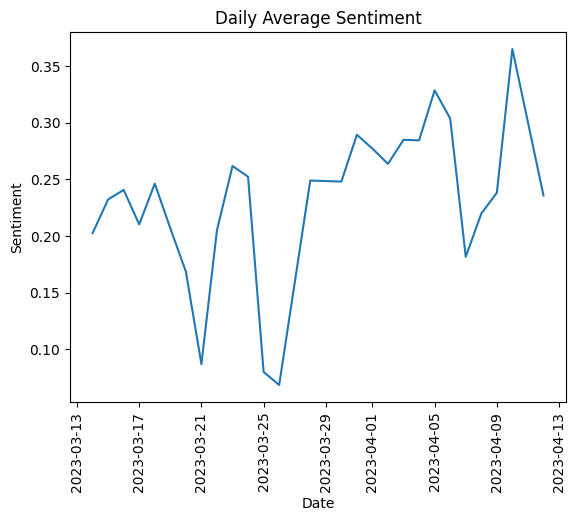

In [14]:
import matplotlib.pyplot as plt
plt.plot(daily_average_sentiment.index, daily_average_sentiment.values)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Daily Average Sentiment')
plt.xticks(rotation=90)
plt.show()

In [15]:
weekly_average_sentiment = ChatGPT_data.groupby(pd.Grouper(key='date', freq='W'))['vader'].mean()
weekly_average_sentiment.dropna(inplace=True)
weekly_average_sentiment

date
2023-03-19    0.222096
2023-03-26    0.097557
2023-04-02    0.254145
2023-04-09    0.272956
2023-04-16    0.341642
Freq: W-SUN, Name: vader, dtype: float64

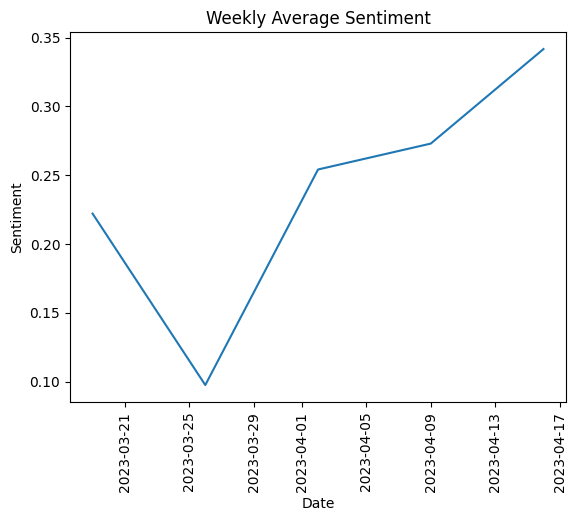

In [16]:
plt.plot(weekly_average_sentiment.index, weekly_average_sentiment.values)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Weekly Average Sentiment')
plt.xticks(rotation=90)
plt.show()

In [17]:
all_text = '\n'.join(ChatGPT_data.text_clean)
with open('/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 'w', encoding='utf-8') as file:
    file.write(all_text)

In [18]:
file = ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt']
chatwords = []
for d in file: 
    with open(str(d), encoding = 'latin1') as nf:
        lines = nf.readlines()
    i = 1
    for x in lines: 
        words = x.split()
        for w in words:
            chatwords.append([d, i, w])
        i += 1

In [19]:
chatwords[0:10]

[['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'join'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'official'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'telegram'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'group'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'stay'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'tuned'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'latest'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'ai'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'news'],
 ['/content/drive/MyDrive/NLP Final Project/GPT4_text.txt', 1, 'ai']]

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#change into dataframe
popwords = pd.DataFrame(chatwords, columns = ['text', 'line', 'word'])
#delete the file path to rename the text name
popwords['text'] = popwords['text'].apply(lambda x: x.split('/')[-1])

In [22]:
popwords

,text,line,word
0,GPT4_text.txt,1,join
1,GPT4_text.txt,1,official
2,GPT4_text.txt,1,telegram
3,GPT4_text.txt,1,group
4,GPT4_text.txt,1,stay
...,...,...,...
311229,GPT4_text.txt,28709,community
311230,GPT4_text.txt,28709,jump
311231,GPT4_text.txt,28710,horizon
311232,GPT4_text.txt,28710,think


In [23]:
import pandas as pd
#get all words includes chatgpt
chatgpt_rows = popwords[popwords['word'].str.contains('chatgpt')]

In [24]:
#after cleaning the words not in dictionary, "chatgpt" won't be counted.
chatgpt_rows.head(30)

,text,line,word
57,GPT4_text.txt,6,chatgpt
58,GPT4_text.txt,6,chatgpt
59,GPT4_text.txt,6,chatgptplus
111,GPT4_text.txt,11,chatgpt
115,GPT4_text.txt,12,chatgpt
127,GPT4_text.txt,13,chatgpt
150,GPT4_text.txt,14,chatgpt
197,GPT4_text.txt,18,chatgpt
201,GPT4_text.txt,19,chatgpt
229,GPT4_text.txt,20,chatgpt


In [25]:
from nltk.probability import FreqDist
nltk.download('punkt')

#inport the frequency counter
freq_dict = FreqDist(popwords["word"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [40]:
freq_dict

FreqDist({'ai': 18990, 'chatgpt': 14275, 'openai': 12201, 'crypto': 5214, 'ape': 5047, 'x': 4252, 'life': 4137, 'doge': 3896, 'airdrop': 3563, 'week': 2838, ...})

In [55]:
# Convert the dictionary to a Pandas DataFrame
df_freq = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['frequency'])
# Sort the DataFrame by frequency in descending order
df_freq = df_freq.sort_values('frequency', ascending=False)
df_freq = df_freq.reset_index(drop=False)
df_freq.head(200)

,index,frequency
0,ai,18990
1,chatgpt,14275
2,openai,12201
3,crypto,5214
4,ape,5047
...,...,...
195,mana,211
196,circle,209
197,big,208
198,working,208


In [56]:
# Manually select the top 150 frequent words, drop the meanless words:
rows_to_delete = [4, 5, 3, 11, 12, 13, 17, 18, 20, 21, 22, 25, 29, 35, 36, 42, 44, 45, 46, 52, 53, 63, 76, 81, 84, 85, 90, 94, 111, 114, 117]
df_freq = df_freq.drop(rows_to_delete)
df_freq = df_freq.rename(columns={'index': 'popular_words'})
#check words
top_150 = df_freq.head(150)
top_150

,popular_words,frequency
0,ai,18990
1,chatgpt,14275
2,openai,12201
6,life,4137
7,doge,3896
...,...,...
176,say,229
177,soon,227
178,times,226
179,look,223


In [93]:
#word list
print(list(top_150["popular_words"]))
print(len(list(top_150["popular_words"])))

['ai', 'chatgpt', 'openai', 'life', 'doge', 'airdrop', 'week', 'world', 'bonk', 'web', 'ready', 'possible', 'save', 'anything', 'high', 'token', 'dog', 'buy', 'productivity', 'may', 'miss', 'triple', 'haven', 'openaichatgpt', 'opportunity', 'contract', 'millionaire', 'new', 'bull', 'like', 'future', 'only', 'model', 'crazy', 'language', 'see', 'portfolio', 'checked', 'technology', 'microsoft', 'code', 'text', 'next', 'time', 'google', 'chat', 'beauty', 'tech', 'today', 'one', 'chatgptbot', 'prompt', 'human', 'powerful', 'data', 'know', 'bing', 'create', 'write', 'check', 'twitter', 'real', 'help', 'image', 'intelligence', 'take', 'better', 'game', 'latest', 'think', 'news', 'work', 'magic', 'would', 'content', 'people', 'free', 'first', 'power', 'could', 'need', 'good', 'access', 'day', 'read', 'wait', 'art', 'generate', 'via', 'artificial', 'large', 'innovation', 'video', 'multimodal', 'live', 'powered', 'potential', 'advanced', 'available', 'learn', 'much', 'poem', 'level', 'business

In [58]:
#rank the keys from most frequent to least
unique_words = list(df_freq['popular_words'])
word_freqs = [freq_dict[word] for word in unique_words]

In [59]:
unique_words

['ai',
 'chatgpt',
 'openai',
 'life',
 'doge',
 'airdrop',
 'week',
 'world',
 'bonk',
 'web',
 'ready',
 'possible',
 'save',
 'anything',
 'high',
 'token',
 'dog',
 'buy',
 'productivity',
 'may',
 'miss',
 'triple',
 'haven',
 'openaichatgpt',
 'opportunity',
 'contract',
 'millionaire',
 'new',
 'bull',
 'like',
 'future',
 'only',
 'model',
 'crazy',
 'language',
 'see',
 'portfolio',
 'checked',
 'technology',
 'microsoft',
 'code',
 'text',
 'next',
 'time',
 'google',
 'chat',
 'beauty',
 'tech',
 'today',
 'one',
 'chatgptbot',
 'prompt',
 'human',
 'powerful',
 'data',
 'know',
 'bing',
 'create',
 'write',
 'check',
 'twitter',
 'real',
 'help',
 'image',
 'intelligence',
 'take',
 'better',
 'game',
 'latest',
 'think',
 'news',
 'work',
 'magic',
 'would',
 'content',
 'people',
 'free',
 'first',
 'power',
 'could',
 'need',
 'good',
 'access',
 'day',
 'read',
 'wait',
 'art',
 'generate',
 'via',
 'artificial',
 'large',
 'innovation',
 'video',
 'multimodal',
 'live'

(-0.5, 399.5, 199.5, -0.5)

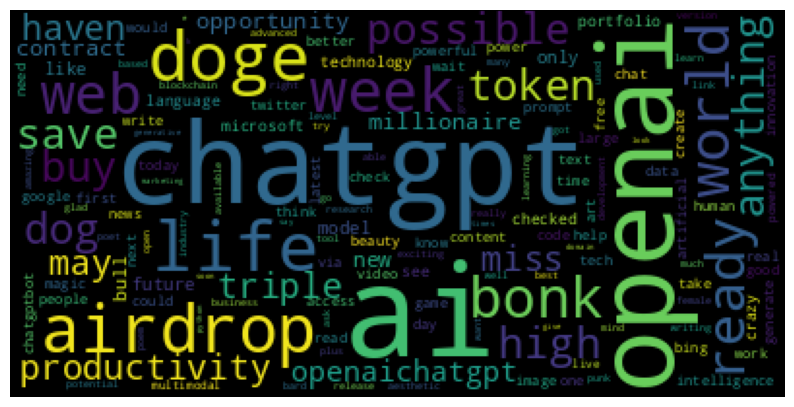

In [60]:
#build the wordcloud
wordcloud = WordCloud(max_words=150, background_color="black").generate_from_frequencies(dict(zip(unique_words, word_freqs)))

# visualize the word cloud
plt.figure(figsize=(10, 10)) # Set figure size
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off") 

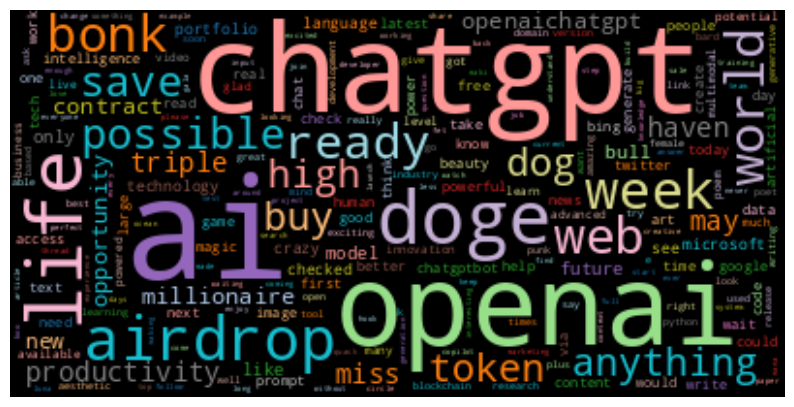

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate a wordcloud
wordcloud = WordCloud(max_words=1000, 
                      background_color="black",
                      colormap='tab20').generate_from_frequencies(dict(zip(unique_words, word_freqs)))

# Set figure size and axis off
plt.figure(figsize=(10, 10))
plt.axis("off")

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [62]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
the_data_t = ChatGPT_data[['text_clean']]
the_data_t

,text_clean
0,join official telegram group stay tuned latest...
1,invest part project reserve total supply no de...
2,get ready ai bot available free phase ai x
3,want ai telegram group choose premium subscrip...
4,discover latest ai moderation telegram premium...
...,...
28705,also
28706,much energy take train powerful language model...
28707,like video think
28708,perfect storm brewing upcoming product launch ...


In [73]:
#import pickle
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import numpy as np
#from func.utils import *
from kneed import KneeLocator

In [75]:
#function for LDA

def rem_sw(var_in):
    from nltk.corpus import stopwords
    sw = stopwords.words("english")
    tmp = var_in.split()
    # tmp_ar = list()
    # for word_t in tmp:
    #     if word_t not in sw:
    #         tmp_ar.append(word_t)
    tmp_ar = [word_t for word_t in tmp if word_t not in sw]
    tmp_o = ' '.join(tmp_ar)
    return tmp_o

def fetch_bi_grams(var):
    sentence_stream = np.array(var)
    bigram = Phrases(sentence_stream, min_count=5, threshold=10, delimiter=",")
    trigram = Phrases(bigram[sentence_stream], min_count=5, threshold=10)
    bigram_phraser = Phraser(bigram)
    trigram_phraser = Phraser(trigram)
    bi_grams = list()
    tri_grams = list()
    for sent in sentence_stream:
        bi_grams.append(bigram_phraser[sent])
        tri_grams.append(trigram_phraser[sent])
    return bi_grams, tri_grams



In [76]:
the_data_t

,text_clean
0,join official telegram group stay tuned latest...
1,invest part project reserve total supply no de...
2,get ready ai bot available free phase ai x
3,want ai telegram group choose premium subscrip...
4,discover latest ai moderation telegram premium...
...,...
28705,also
28706,much energy take train powerful language model...
28707,like video think
28708,perfect storm brewing upcoming product launch ...


In [68]:
## removed before and this step could remove ai related words if necessary
#the_data_t["text_clean"] = the_data_t.text_clean.apply(rem_sw)

In [77]:
the_data_t['text_clean'] = the_data_t['text_clean'].apply(lambda x: x.split())

<ipython-input-77-1e61ef6202cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_data_t['text_clean'] = the_data_t['text_clean'].apply(lambda x: x.split())


In [78]:
the_data_t

,text_clean
0,"[join, official, telegram, group, stay, tuned,..."
1,"[invest, part, project, reserve, total, supply..."
2,"[get, ready, ai, bot, available, free, phase, ..."
3,"[want, ai, telegram, group, choose, premium, s..."
4,"[discover, latest, ai, moderation, telegram, p..."
...,...
28705,[also]
28706,"[much, energy, take, train, powerful, language..."
28707,"[like, video, think]"
28708,"[perfect, storm, brewing, upcoming, product, l..."


(0, '0.039*"chatgpt" + 0.039*"ai" + 0.031*"openai" + 0.011*"new"')
(1, '0.144*"ai" + 0.121*"chatgpt" + 0.060*"openai" + 0.056*"crypto"')
(2, '0.029*"high" + 0.025*"buy,token" + 0.024*"ai" + 0.011*"finally"')
(3, '0.081*"ape" + 0.043*"openai" + 0.040*"ai" + 0.038*"c"')
(4, '0.126*"openai" + 0.081*"ai" + 0.057*"chatgpt" + 0.036*"doge"')

Coherence Score:  0.5464502721676592
1
2
3
4
5
6
7
Optimal topics is <kneed.knee_locator.KneeLocator object at 0x7f229fbc3430>


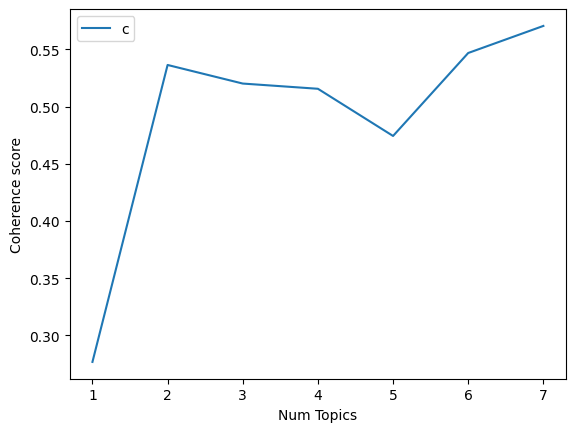

In [79]:
if __name__ == '__main__':
    #the_path = "/Users/qichen/Desktop/Columbia/Courses/23Spring/5067/spyder/"
    #the_data_t = pickle.load(open(the_path + "data_t.pkl", "rb")).str.split() #unigram
    bi, tri = fetch_bi_grams(the_data_t.text_clean)

    the_data = bi

    dictionary = Dictionary(the_data)
    id2word = corpora.Dictionary(the_data)
    
    corpus = [id2word.doc2bow(text) for text in the_data]
    
    n_topics = 5
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus, num_topics=n_topics, id2word=id2word, iterations=50, passes=15,
        random_state=123)
    ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(topic)
        
    #compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                         dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    
    c_scores = list()
    for word in range(1, 8):
        ldamodel = gensim.models.ldamodel.LdaModel(
            corpus, num_topics=word, id2word=id2word, iterations=5, passes=5,
            random_state=123)
        coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                              dictionary=dictionary,
                                              coherence='c_v')
        c_scores.append(coherence_model_lda.get_coherence())
        print (word)
    
    x = range(1, 8)
    kn = KneeLocator(x, c_scores,
                     curve='concave', direction='increasing')
    opt_topics = kn.knee
    print ("Optimal topics is", kn)
    plt.plot(x, c_scores)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

(0, '0.084*"ape" + 0.049*"high" + 0.042*"buy,token" + 0.038*"crazy,airdrop"')
(1, '0.140*"ai" + 0.122*"chatgpt" + 0.080*"crypto" + 0.064*"world"')
(2, '0.024*"but" + 0.023*"not" + 0.010*"like" + 0.009*"good"')
(3, '0.063*"openai" + 0.061*"c" + 0.056*"anything,possible" + 0.055*"haven,may"')
(4, '0.111*"openai" + 0.080*"ai" + 0.060*"doge" + 0.053*"chatgpt"')
(5, '0.035*"ai" + 0.031*"chatgpt" + 0.026*"model" + 0.022*"openai"')
(6, '0.071*"ai" + 0.064*"chatgpt" + 0.052*"openai" + 0.017*"new"')

Coherence Score:  0.5255963447426266
1
2
3
4
5
6
7
Optimal topics is <kneed.knee_locator.KneeLocator object at 0x7f229fb930a0>


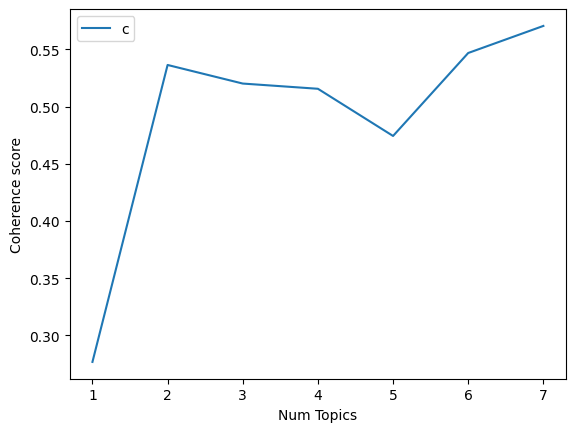

In [80]:
if __name__ == '__main__':

    bi, tri = fetch_bi_grams(the_data_t.text_clean)

    the_data = bi

    dictionary = Dictionary(the_data)
    id2word = corpora.Dictionary(the_data)
    
    corpus = [id2word.doc2bow(text) for text in the_data]
    
    n_topics = 7
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus, num_topics=n_topics, id2word=id2word, iterations=50, passes=15,
        random_state=123)
    ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(topic)
        
    #compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                         dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    
    c_scores = list()
    for word in range(1, 8):
        ldamodel = gensim.models.ldamodel.LdaModel(
            corpus, num_topics=word, id2word=id2word, iterations=5, passes=5,
            random_state=123)
        coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                              dictionary=dictionary,
                                              coherence='c_v')
        c_scores.append(coherence_model_lda.get_coherence())
        print (word)
    
    x = range(1, 8)
    kn = KneeLocator(x, c_scores,
                     curve='concave', direction='increasing')
    opt_topics = kn.knee
    print ("Optimal topics is", kn)
    plt.plot(x, c_scores)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [81]:
#check the best quantity of selected topics
opt_topics

2

In [82]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"contract,x" + 0.061*"millionaire,web" + 0.061*"haven,may"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai"')
(6, '0.099*"ai" + 0.076*"openai" + 0.074*"chatgpt" + 0.018*"new" + 0.009*"technology"')


In [83]:
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like" + 0.009*"ai"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop" + 0.058*"openaichatgpt"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new" + 0.008*"better"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"contract,x" + 0.061*"millionaire,web" + 0.061*"haven,may" + 0.061*"ea,f"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone" + 0.039*"no,doubt"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai" + 0.018*"breaking"')
(6, '0.099*"ai" + 0.076*"openai" + 0.074*"chatgpt" + 0.018*"new" + 0.009*"technology" + 0.009*"microsoft"')


In [84]:
topics = ldamodel.print_topics(num_words=7)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like" + 0.009*"ai" + 0.008*"get"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop" + 0.058*"openaichatgpt" + 0.053*"openai"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new" + 0.008*"better" + 0.007*"no"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"millionaire,web" + 0.061*"ea,f" + 0.061*"miss,opportunity" + 0.061*"haven,may" + 0.061*"contract,x"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone" + 0.039*"no,doubt" + 0.038*"ape"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai" + 0.018*"breaking" + 0.017*"power"')
(6, '0.099*"ai" + 0.076*"openai" + 0.074*"chatgpt" + 0.018*"new" + 0.009*"technology" + 0.009*"microsoft" + 0.008*"future"')


In [85]:
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like" + 0.009*"ai" + 0.008*"get" + 0.007*"time"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop" + 0.058*"openaichatgpt" + 0.053*"openai" + 0.030*"ready,enter"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new" + 0.008*"better" + 0.007*"no" + 0.007*"magic"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"millionaire,web" + 0.061*"ea,f" + 0.061*"miss,opportunity" + 0.061*"haven,may" + 0.061*"contract,x" + 0.058*"openai"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone" + 0.039*"no,doubt" + 0.038*"ape" + 0.032*"saved,dog"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai" + 0.018*"breaking" + 0.017*"power" + 0.017*"fet"')
(6, '0.099*"ai" + 0.076*"openai" + 0.074*"chatgpt" + 0.018*"new" + 0.009*"technology" + 0.009*"microsoft" + 0.008*"future" + 0.008*"tech"')


In [86]:
topics = ldamodel.print_topics(num_words=9)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like" + 0.009*"ai" + 0.008*"get" + 0.007*"time" + 0.007*"one"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop" + 0.058*"openaichatgpt" + 0.053*"openai" + 0.030*"ready,enter" + 0.022*"triple,productivity"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new" + 0.008*"better" + 0.007*"no" + 0.007*"magic" + 0.006*"data"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"millionaire,web" + 0.061*"ea,f" + 0.061*"miss,opportunity" + 0.061*"haven,may" + 0.061*"contract,x" + 0.058*"openai" + 0.043*"ai"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone" + 0.039*"no,doubt" + 0.038*"ape" + 0.032*"saved,dog" + 0.032*"save,life"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai" + 0.018*"breaking" + 0.017*"power" + 0.017*"fet" + 0.015*"new"')
(6, '0.099*"ai" + 0.076*"openai" + 0.074*

In [87]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.026*"chatgpt" + 0.017*"openai" + 0.016*"but" + 0.014*"not" + 0.010*"like" + 0.009*"ai" + 0.008*"get" + 0.007*"time" + 0.007*"one" + 0.007*"see"')
(1, '0.150*"chatgpt" + 0.140*"ai" + 0.089*"crypto" + 0.077*"world" + 0.064*"airdrop" + 0.058*"openaichatgpt" + 0.053*"openai" + 0.030*"ready,enter" + 0.022*"triple,productivity" + 0.020*"ape"')
(2, '0.030*"model" + 0.027*"text" + 0.018*"ai" + 0.009*"large,multimodal" + 0.008*"new" + 0.008*"better" + 0.007*"no" + 0.007*"magic" + 0.006*"data" + 0.006*"code"')
(3, '0.069*"c" + 0.062*"anything,possible" + 0.061*"millionaire,web" + 0.061*"ea,f" + 0.061*"miss,opportunity" + 0.061*"haven,may" + 0.061*"contract,x" + 0.058*"openai" + 0.043*"ai" + 0.031*"chatgpt"')
(4, '0.116*"openai" + 0.078*"ai" + 0.050*"doge" + 0.048*"chatgpt" + 0.041*"bone" + 0.039*"no,doubt" + 0.038*"ape" + 0.032*"saved,dog" + 0.032*"save,life" + 0.032*"life,ape"')
(5, '0.054*"high" + 0.043*"buy,token" + 0.025*"twitter" + 0.023*"next" + 0.020*"ai" + 0.018*"breaking" + 0.017

In [106]:
import re
import collections
import pandas as pd

# read in the text file as a string
with open("string_key_topic.txt", 'r') as f:
    text = f.read()

# split the text into individual words using regex
word_list = re.split("[ *\n]+", text)

# remove non-alphabetic characters and convert to lowercase
word_list = [re.sub("[^A-Za-z']+", "", word).lower() for word in word_list]

# remove empty strings
word_list = list(filter(None, word_list))

# count the occurrences of each word
word_counts = collections.Counter(word_list)

# create a pandas DataFrame from the word counts
df_topic = pd.DataFrame({'word': list(word_counts.keys()), 'frequency': list(word_counts.values())})

# sort the DataFrame by frequency in descending order
df_topic = df_topic.sort_values('frequency', ascending=False)


In [110]:
df_topic.head(15)

,word,frequency
1,',21
7,ai,16
2,chatgpt,12
3,openai,11
27,new,5
13,largemultimodal,3
25,next,3
24,twitter,3
23,buytoken,3
22,high,3
